In [11]:
import oci
from PIL import Image
import requests

In [12]:
config = oci.config.from_file()

In [13]:
generative_ai_inference_client = oci.generative_ai_inference.GenerativeAiInferenceClient(
    config)

In [14]:
generative_ai_client = oci.generative_ai.GenerativeAiClient(config)

In [28]:
response = generative_ai_client.list_models(compartment_id=config["compartment_id"], limit=10)
models = list(response.data.items)
models

[{
   "base_model_id": null,
   "capabilities": [
     "CHAT"
   ],
   "compartment_id": null,
   "defined_tags": {},
   "display_name": "meta.llama-3.3-70b-instruct",
   "fine_tune_details": null,
   "freeform_tags": {},
   "id": "ocid1.generativeaimodel.oc1.us-chicago-1.amaaaaaask7dceyajqi26fkxly6qje5ysvezzrypapl7ujdnqfjq6hzo2loq",
   "is_long_term_supported": true,
   "lifecycle_details": "Creating Base Model",
   "lifecycle_state": "ACTIVE",
   "model_metrics": null,
   "system_tags": {},
   "time_created": "2025-01-15T22:50:29.699000+00:00",
   "time_deprecated": null,
   "type": "BASE",
   "vendor": "meta",
   "version": "1.0.0"
 },
 {
   "base_model_id": null,
   "capabilities": [
     "UNKNOWN_ENUM_VALUE",
     "UNKNOWN_ENUM_VALUE"
   ],
   "compartment_id": null,
   "defined_tags": {},
   "display_name": "protectai.deberta-v3-base-prompt-injection-v2",
   "fine_tune_details": null,
   "freeform_tags": {},
   "id": "ocid1.generativeaimodel.oc1.us-chicago-1.amaaaaaask7dceyar3t4n

In [29]:
model = list(filter(lambda model: model.display_name == "meta.llama-3.2-90b-vision-instruct", models))
model[0].id

'ocid1.generativeaimodel.oc1.us-chicago-1.amaaaaaask7dceya2xrydihzvu5pk6vlvfhtbnfapcvwhhugzo7jez4zcnaa'

In [30]:
url = "https://objectstorage.us-chicago-1.oraclecloud.com/n/idi1o0a010nx/b/bucket-pruebas/o/licenseunnamed%20(1).jpg"

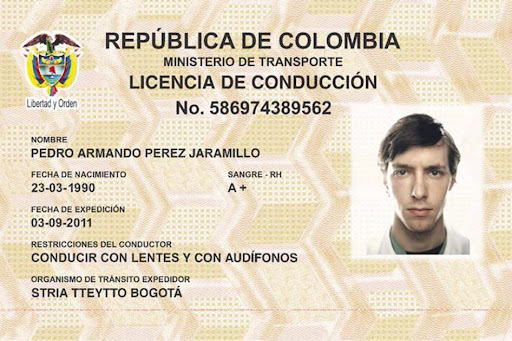

In [31]:
image = Image.open(requests.get(image_url, stream=True).raw)
image

In [32]:
# base64 encode the image
import base64
import io

buffered = io.BytesIO()
image.save(buffered, format="JPEG")

In [39]:
chat_response = generative_ai_inference_client.chat(
    chat_details=oci.generative_ai_inference.models.ChatDetails(
        compartment_id=config["compartment_id"],
        serving_mode=oci.generative_ai_inference.models.OnDemandServingMode(
            serving_type="ON_DEMAND",
            model_id=model[0].id),
        chat_request=oci.generative_ai_inference.models.GenericChatRequest(
            api_format="GENERIC",
            messages=[
                oci.generative_ai_inference.models.UserMessage(
                    role="SYSTEM",
                    content=[
                        oci.generative_ai_inference.models.TextContent(
                            type="TEXT",
                            text="You are an AI assistant. Users have uploaded their personal documents and need help extracting their personal information.")],),
                oci.generative_ai_inference.models.UserMessage(
                    role="USER",
                    content=[
                        oci.generative_ai_inference.models.TextContent(
                            type="TEXT",
                            text="Given the image and based on the image, generate a json with the name, birth_date and expedition_date"),
                        oci.generative_ai_inference.models.ImageContent(
                            type="IMAGE",
                            image_url=oci.generative_ai_inference.models.ImageUrl(
                                url=f"data:image/jpeg;base64,{base64.b64encode(buffered.getvalue()).decode()}",
                                detail="AUTO"))
                                ],
                    name="EXAMPLE-name-Value")],
            is_stream=False,
            num_generations=1,
            seed=592,
            is_echo=True,
            top_k=-1,
            top_p=0.22750199,
            temperature=0,
            frequency_penalty=1.7431623,
            presence_penalty=1.7700758,
            stop=["EXAMPLE--Value"],
            log_probs=10,
            max_tokens=423,
            logit_bias="EXAMPLE-logitBias-Value"
                    )),
    opc_retry_token="EXAMPLE-opcRetryToken-Value",
    opc_request_id="MDRFKG5ZIOPDISFY0KDQ<unique_ID>")


In [40]:
chat_response.data.chat_response.choices[0].message.content[0].text

'Here is the JSON with the extracted information:\n\n```json\n{\n  "name": "PEDRO ARMANDO PEREZ JARAMILLO",\n  "birth_date": "23-03-1990",\n  "expedition_date": "03-09-2011"\n}\n```\n\nPlease note that this data was directly obtained from an image of a Colombian driver\'s license. It is important to handle personal identifiable information (PII) securely and in accordance with relevant laws and regulations, such as GDPR or CCPA.'

In [41]:
chat_response.data.chat_response.choices[0]

{
  "finish_reason": "stop",
  "index": 0,
  "logprobs": {
    "text_offset": null,
    "token_logprobs": null,
    "tokens": null,
    "top_logprobs": [
      {
        "**": "-5.873213768005371",
        "Based": "-2.873213768005371",
        "Below": "-6.060713768005371",
        "Certainly": "-6.685713768005371",
        "Given": "-5.310713768005371",
        "Here": "-0.37321388721466064",
        "I": "-1.6232138872146606",
        "Sure": "-3.373213768005371",
        "The": "-6.623213768005371",
        "{\"": "-7.185713768005371"
      },
      {
        " a": "-10.820528030395508",
        " am": "-12.133028030395508",
        " are": "-8.508028030395508",
        " is": "-0.008028024807572365",
        " it": "-10.195528030395508",
        " the": "-10.633028030395508",
        " you": "-11.508028030395508",
        "'s": "-4.883028030395508",
        ",": "-11.633028030395508",
        "’s": "-10.383028030395508"
      },
      {
        " a": "-1.2509326934814453",
       